# 식료품 연관 규칙 분석

식료품 매장의 거래 데이터에 대해 장바구니 분석을 수행

## 1. 데이터 수집

arules R 패키지의 Groceries 데이터셋
- 식료품 매장의 한 달 간의 구매 데이터
- 9,835건의 거래, 169개의 아이템

## 2. 데이터 탐색과 전처리
Groceries 데이터는 transaction 형식으로 제공되어진다.

In [30]:
library(arules)
library(arulesViz)
data(Groceries)

행렬에서 0이 아닌 셀의 비율인 density 값을 보면 9835 x 169 x 0.02609146 = 43367개의 아이템이 구매되었으며 평균 거래는 43367 / 9835  4.409 개의 다른 아이템을 포함하고 있다. 가장 흔히 구매한 아이템은 whole milk, other vegetables, rolls/buns, soda 등이다.

In [31]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [32]:
inspect(head(Groceries))

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        


해당 아이템을 포함하는 거래의 비율을 확인할 수 있다. 즉, 각 아이템에 대한 지지도를 확인할 수 있다.

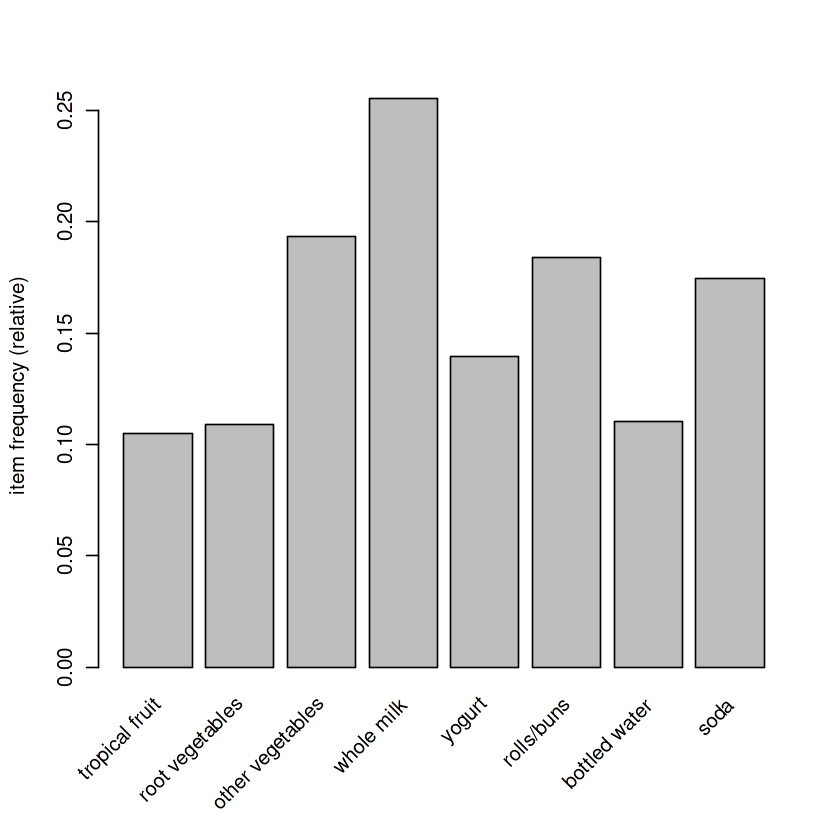

In [33]:
itemFrequencyPlot(Groceries, support=0.1)

상위 20개의 아이템의 지지도를 확인해보자.

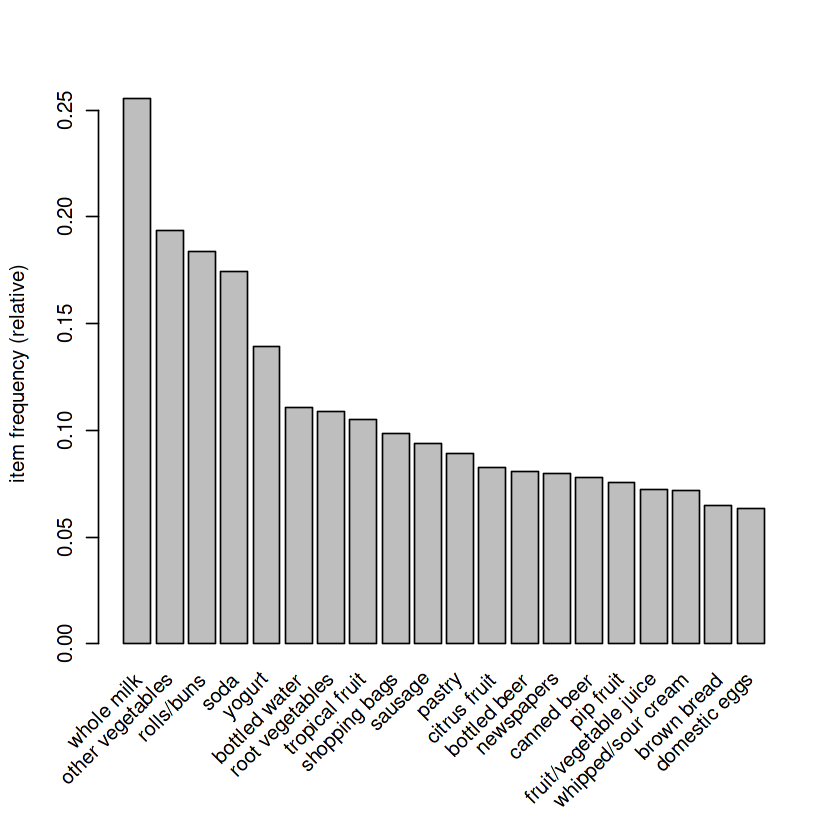

In [34]:
itemFrequencyPlot(Groceries, topN = 20)

**희소 행렬**

희소 행렬을 개략적으로 확인해보자. 전체 희소 행렬은 매우 크기 때문에 부분 집합을 사용하여 확인한다. 처음 다섯 개의 거래에 대한 희소 행렬을 확인해보자.
아이템은 열로 표현되며 해당 아이템을 구매한 거래가 행으로 나타나 검정색으로 채워진다. 이를 통해 1, 4, 5 번째 거래는 각각 네 개의 아이템을 포함하고 있다는 것을 알 수 있다.

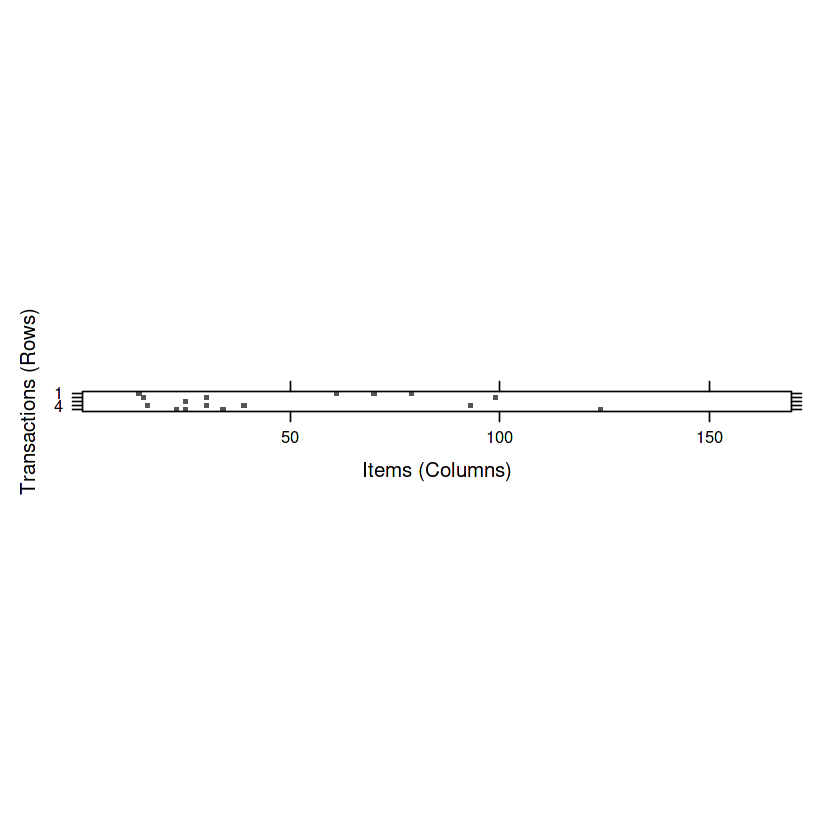

In [35]:
image(Groceries[1:5])

다음으로는 임의의 100개 거래를 선택하여 희소 행렬을 확인해보자. 점의 분포는 대체적으로 랜덤하게 보이므로 분석을 계속 진행한다.

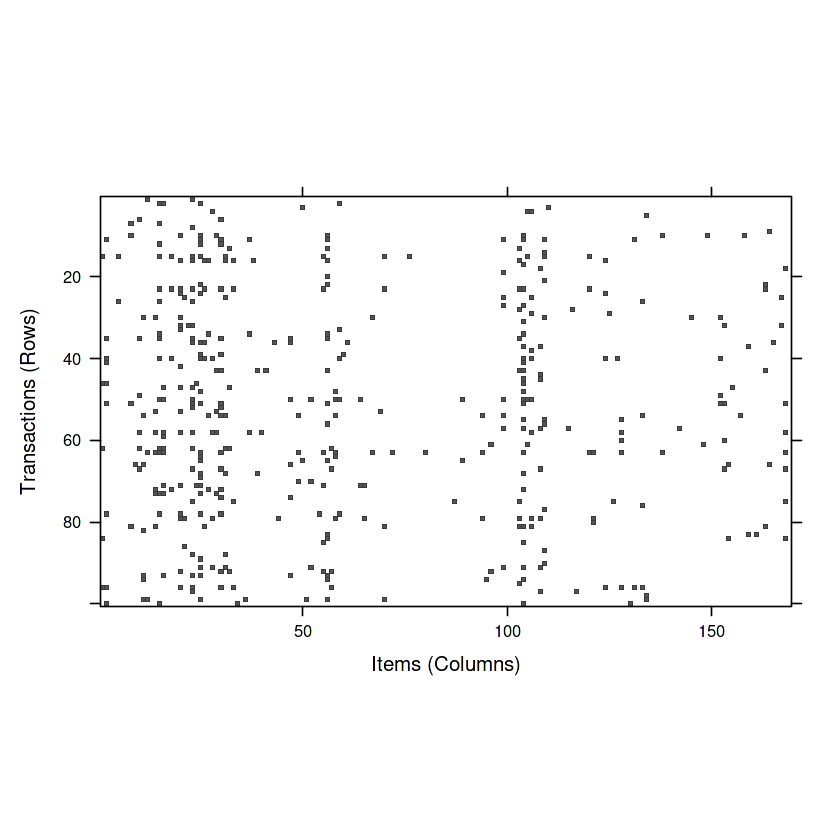

In [36]:
image(sample(Groceries, 100))

## 3. 모델 훈련

arules 패키지의 아프리오리 알고리즘을 사용하여 장바구니 아이템 간의 연관성을 찾아보자.<br>
우선, 연관 규칙을 찾는다. 최소 규칙 지지도가 0.006 이고, 최소 규칙 신뢰도는 0.25, 최소 규칙 아이템은 2개인 연관 규칙을 찾아본다.

총 463개의 연관 규칙이 발견되었으며 이 중 어떤 것이 유용한지 확인해보자.

In [37]:
groceryrules <- apriori(Groceries, parameter = list(support = 0.006, confidence = 0.25, minlen = 2))
groceryrules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 463 rules 

## 4. 모델 성능 평가

규칙 집합의 특성을 확인하고 규칙 품질 척도인 지지도, 신뢰도, 향상도의 요약 통계를 확인해보자.

In [38]:
summary(groceryrules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.006101   Min.   :0.2500   Min.   :0.009964   Min.   :0.9932  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:0.018709   1st Qu.:1.6229  
 Median :0.008744   Median :0.3554   Median :0.024809   Median :1.9332  
 Mean   :0.011539   Mean   :0.3786   Mean   :0.032608   Mean   :2.0351  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:0.035892   3rd Qu.:2.3565  
 Max.   :0.074835   Max.   :0.6600   Max.   :0.255516   Max.   :3.9565  
     count      
 Min.   : 60.0  
 1st Qu.: 70.0  
 Median : 86.0  
 Mean   :113.5  
 3rd Qu.:121.0  
 Max.   :736.0  

mining info:
      data ntransactions support confidence
 Groceries          9835   0.006       0.25

처음 세 개의 규칙을 관찰해보자.<br>
'화분에 심겨진 식물을 산다면 전유도 살 것이다' 라는 첫 번째 규칙은 지지도가 0.007이고 신뢰도가 0.400으로 전체 거래의 0.7 %를 차지하며 화분에 심겨진 식물의 거래의 40%에서 이 규칙이 옳다고 볼 수 있다. 향상도는 1.56으로 유의미한 규칙이라고 볼 수 있다. 하지만 일반적으로 생각해보면 이 규칙은 유용한 규칙이라고 보긴 어렵다. 따라서 '설명하기 어려운' 규칙으로 분류하는 것이 타당할 것이다.

In [39]:
inspect(groceryrules[1:3])

    lhs             rhs               support     confidence coverage  
[1] {pot plants} => {whole milk}      0.006914082 0.4000000  0.01728521
[2] {pasta}      => {whole milk}      0.006100661 0.4054054  0.01504830
[3] {herbs}      => {root vegetables} 0.007015760 0.4312500  0.01626843
    lift     count
[1] 1.565460 68   
[2] 1.586614 60   
[3] 3.956477 69   


lift 기준으로 상위 20개의 규칙을 시각화하면 다음과 같다.

Available control parameters (with default values):
main	 =  Graph for 20 rules
max	 =  100
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EEB5B5FF", "#EEB7B7FF", "#EEB8B8F

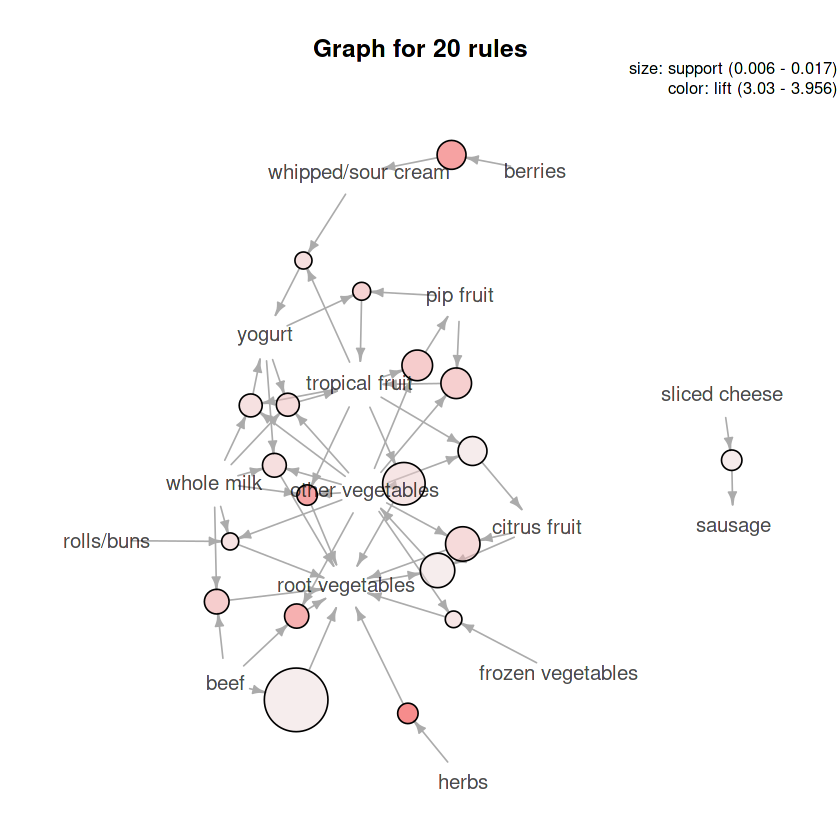

In [40]:
toprules <- head(sort(groceryrules, by="lift"), 20)
plot(toprules, method="graph", control=list(type="items"))

## 5. 모델 성능 개선

결과를 더욱 활용 가능하게 만들어 규칙의 성능을 개선해보자.

**연관 규칙 집합 정렬**

연관 규칙을 정렬하여 lift 값이 큰 즉, 향상도의 측면에서 최고의 다섯개의 규칙을 검토해보자.<br>
모델 성능 평가에서 보았던 규칙보다는 좀 더 유의미한 결과들을 확인할 수 있다. <br>
- 첫 번째 규칙은 '허브를 산다면 뿌리 채소를 살 것이다`라는 규칙으로, 이는 뿌리 채소를 산 일반 고객보다 거의 4배 정도 높다는 것을 알 수 있다. 
- 두 번째 규칙은 '베리를 산다면 휘핑크림을 살 것이다'라는 규칙으로 휘핑크림이 다른 장바구니에 비해 베리가 포함된 장바구니에서 발견될 가능성이 3배 이상 높다는 것을 의미한다.

In [41]:
inspect(sort(groceryrules, by = "lift")[1:5])

    lhs                   rhs                      support confidence   coverage     lift count
[1] {herbs}            => {root vegetables}    0.007015760  0.4312500 0.01626843 3.956477    69
[2] {berries}          => {whipped/sour cream} 0.009049314  0.2721713 0.03324860 3.796886    89
[3] {tropical fruit,                                                                           
     other vegetables,                                                                         
     whole milk}       => {root vegetables}    0.007015760  0.4107143 0.01708185 3.768074    69
[4] {beef,                                                                                     
     other vegetables} => {root vegetables}    0.007930859  0.4020619 0.01972547 3.688692    78
[5] {tropical fruit,                                                                           
     other vegetables} => {pip fruit}          0.009456024  0.2634561 0.03589222 3.482649    93


**연관 규칙의 부분집합 구하기**

두 번째 규칙을 채택한다면 우선, 베리를 포함하는 모든 규칙을 확인해볼 필요가 있다.<br>
베리를 포함하는 규칙은 총 4개이고 이 중 향상도가 높은 첫 번째와 두 번째 규칙을 선택할 수 있겠다.

In [42]:
berryrules <- subset(groceryrules, items %in% "berries")
inspect(berryrules)

    lhs          rhs                  support     confidence coverage  lift    
[1] {berries} => {whipped/sour cream} 0.009049314 0.2721713  0.0332486 3.796886
[2] {berries} => {yogurt}             0.010574479 0.3180428  0.0332486 2.279848
[3] {berries} => {other vegetables}   0.010269446 0.3088685  0.0332486 1.596280
[4] {berries} => {whole milk}         0.011794611 0.3547401  0.0332486 1.388328
    count
[1]  89  
[2] 104  
[3] 101  
[4] 116  


**연관규칙 시각화**

베리의 연관 규칙을 시각화해서 나타내보자.

Available control parameters (with default values):
main	 =  Graph for 4 rules
max	 =  100
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EEB5B5FF", "#EEB7B7FF", "#EEB8B8FF

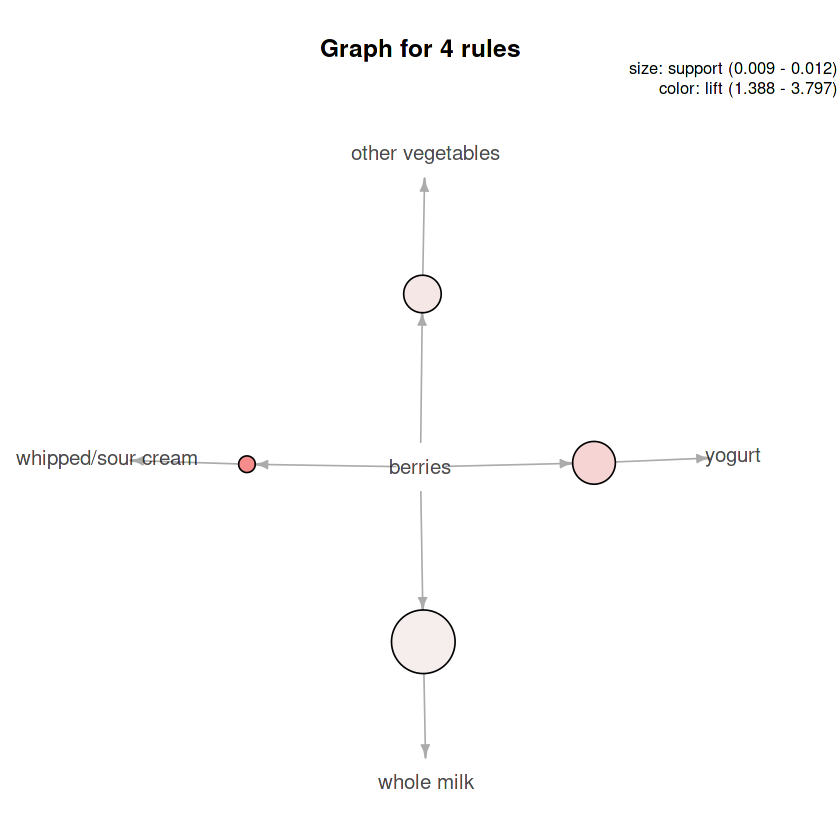

In [43]:
plot(berryrules, method = "graph", control = list(type="items"))

Available control parameters (with default values):
main	 =  Parallel coordinates plot for 4 rules
reorder	 =  FALSE
interactive	 =  FALSE
engine	 =  default
gp_labels	 =  list()
newpage	 =  TRUE
col	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", 

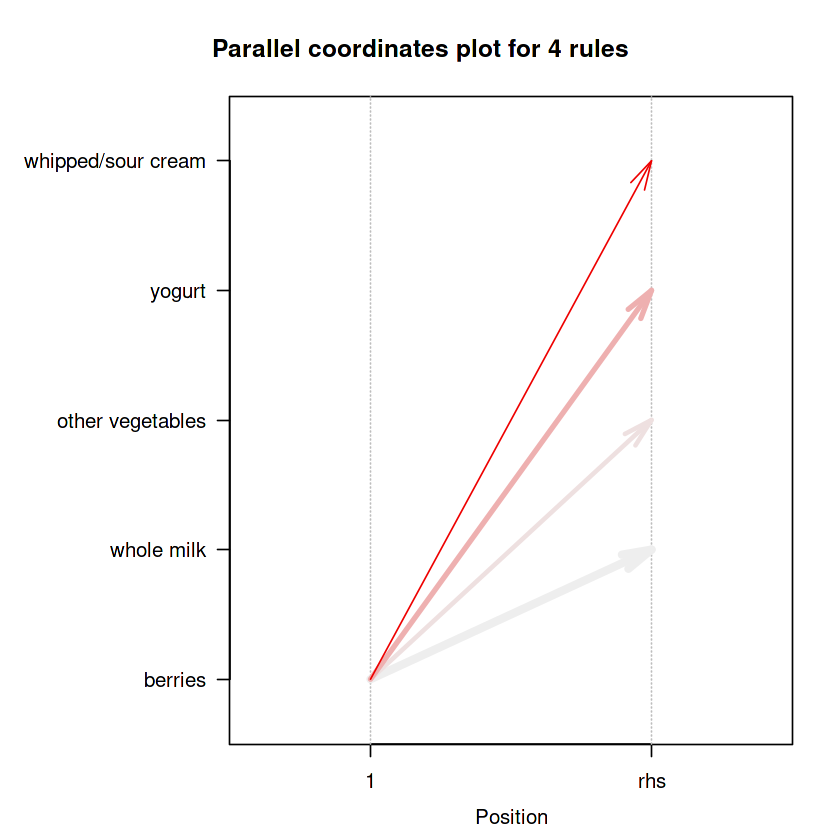

In [44]:
plot(berryrules, method = "paracoord", control = list(recorder=TRUE))